# Making research part on BIWI dataset

1. By biwi_trainEmbeds.npz and biwi_trainPoses.npz I will make one dataset: feature, pitch, yaw.
2. I will sort by users. And for each one I found central feature in pose space (pitch, yaw). And them I will make new dataset: (similarity, pitch, yaw) 
3. Here similarity for each sample of the USER with his central sample (2 point). Then we obtain for each person: similarity(feature_i, center_feature), pitch_i, yaw_i. 
4. Then make clustering (3D aglomerative) to obtain that our feature space is separable by pose types. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from math import ceil 

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline 

from matplotlib.patches import Ellipse
from collections import Counter 

import tqdm 

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import numpy as np

import shutil
import os 
import glob 

from PIL import Image, ImageDraw
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook
import cv2
import numpy as np
import pickle
from scipy.spatial import distance
import itertools
import scipy.cluster.hierarchy as sch 
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# 1. Make One Dataset

In [ ]:
DATA_PATH = '/content/drive/MyDrive/Samal_work'
TRAIN_POSES = os.path.join(DATA_PATH, 'biwi_trainPoses.npz')
TRAIN_EMBEDS = os.path.join(DATA_PATH, 'biwi_trainEmbeds.npz')
# Load the saved embeddings to use them futher 
trainEmbeds, trainLabels = np.load(TRAIN_EMBEDS, allow_pickle=True).values()

# Load the saved embeddings to use them futher 
trainPoses, trainPosesLabels = np.load(TRAIN_POSES, allow_pickle=True).values()

In [ ]:
def make_finall_ds(trainP, trainEm, trainL):
  finalDataset = {
      'feature': [],
      'yaw': [],
      'pitch': [],
      'label': []}
  for i in tqdm.trange(len(trainP)):
    finalDataset['feature'].append(trainEm[i])
    finalDataset['yaw'].append(trainP[i][0])
    finalDataset['pitch'].append(trainP[i][1])
    finalDataset['label'].append(trainL[i])
  return finalDataset

In [ ]:
finalData = make_finall_ds(trainPoses, trainEmbeds, trainLabels)

100%|██████████| 15226/15226 [00:00<00:00, 483198.95it/s]


In [ ]:
# Save it to pickle
# with open('biwi_finall.pkl', 'wb') as handle:
    # pickle.dump(finalData, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# move to MyDrive
# shutil.move("/content/biwi_finall.pkl", "/content/drive/MyDrive/Samal_work")

# 2. Find center for each user

In [ ]:
with open('/content/drive/MyDrive/Samal_work/biwi_finall.pkl', 'rb') as handle:
    finalDataset = pickle.load(handle)

In [ ]:
print('finalDataset keys: ', finalDataset.keys())
print('length of finalDataset features and others:', len(finalDataset['feature']))
print('example of the Label: ', finalDataset['label'][0])

finalDataset keys:  dict_keys(['feature', 'yaw', 'pitch', 'label'])
length of finalDataset features and others: 15226
example of the Label:  0


In [ ]:
def make_users_data(dataset):
  features = dataset['feature']
  yaw = dataset['yaw']
  pitch = dataset['pitch']
  labels = dataset['label']
  users_dataset = {} # {label: {feature: [], yaw: [], pitch: []}}
  for label in np.unique(labels):
    print('current user is ', label)
    users_dataset[label] = {'feature': [], 'yaw': [], 'pitch': []}
    for i in tqdm.trange(len(features)):
      if label == labels[i]:
        users_dataset[label]['feature'].append(features[i])
        users_dataset[label]['yaw'].append(yaw[i])
        users_dataset[label]['pitch'].append(pitch[i])
  return users_dataset

In [ ]:
usersDataset = make_users_data(finalDataset)

current user is  0


100%|██████████| 15226/15226 [00:00<00:00, 1640401.55it/s]


current user is  1


100%|██████████| 15226/15226 [00:00<00:00, 1676136.39it/s]


current user is  2


100%|██████████| 15226/15226 [00:00<00:00, 1924843.95it/s]


current user is  3


100%|██████████| 15226/15226 [00:00<00:00, 1427094.36it/s]


current user is  4


100%|██████████| 15226/15226 [00:00<00:00, 2422244.37it/s]


current user is  5


100%|██████████| 15226/15226 [00:00<00:00, 2629059.02it/s]


current user is  6


100%|██████████| 15226/15226 [00:00<00:00, 1802242.77it/s]


current user is  7


100%|██████████| 15226/15226 [00:00<00:00, 2082449.30it/s]


current user is  8


100%|██████████| 15226/15226 [00:00<00:00, 2127614.36it/s]


current user is  9


100%|██████████| 15226/15226 [00:00<00:00, 1529200.53it/s]


current user is  10


100%|██████████| 15226/15226 [00:00<00:00, 1550323.42it/s]


current user is  11


100%|██████████| 15226/15226 [00:00<00:00, 1928098.32it/s]


current user is  12


100%|██████████| 15226/15226 [00:00<00:00, 1972037.82it/s]


current user is  13


100%|██████████| 15226/15226 [00:00<00:00, 1668952.64it/s]


current user is  14


100%|██████████| 15226/15226 [00:00<00:00, 2202989.85it/s]


current user is  15


100%|██████████| 15226/15226 [00:00<00:00, 1753789.00it/s]


current user is  16


100%|██████████| 15226/15226 [00:00<00:00, 1804789.39it/s]


current user is  17


100%|██████████| 15226/15226 [00:00<00:00, 1380959.51it/s]


current user is  18


100%|██████████| 15226/15226 [00:00<00:00, 1297727.60it/s]


current user is  19


100%|██████████| 15226/15226 [00:00<00:00, 2508936.62it/s]


current user is  20


100%|██████████| 15226/15226 [00:00<00:00, 1212709.08it/s]


current user is  21


100%|██████████| 15226/15226 [00:00<00:00, 2550723.84it/s]


current user is  22


100%|██████████| 15226/15226 [00:00<00:00, 2671622.85it/s]


current user is  23


100%|██████████| 15226/15226 [00:00<00:00, 1211007.35it/s]


In [ ]:
users_labels = usersDataset.keys()
for each in users_labels:
  print(each, ': ', len(usersDataset[each]['feature']))

0 :  499
1 :  511
2 :  730
3 :  744
4 :  946
5 :  481
6 :  745
7 :  772
8 :  882
9 :  726
10 :  572
11 :  732
12 :  485
13 :  797
14 :  596
15 :  866
16 :  367
17 :  590
18 :  462
19 :  537
20 :  562
21 :  643
22 :  542
23 :  439


## 2.1 Checke the coincidence of the alignet data and users_dataset

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Samal_work/faces_0_cropped.zip", 'r')
zip_ref.extractall('/content')
zip_ref.close()

def get_files(path='./', end_path='/*.pgm', ext=('.info')):
    """ Get all image files """
    path_sorted = sorted(os.listdir(path))
    files_all = []
    for file in path_sorted:
       files_path = os.path.join(path, file)
       files_list = glob.glob(f'{files_path}{end_path}')
       files_all.extend(files_list)
    return files_all

ALIGNED_DATA = '/content/content/faces_0_cropped'
data_files = get_files(ALIGNED_DATA, end_path='/*.png')
len(data_files)

15226

In [ ]:
# prepare info for printing
dataC = Counter(map(os.path.dirname, data_files))
data_total, data_text  = sum(dataC.values()), '\n'.join([f'\t- {os.path.basename(fp)} - {c}' for fp, c in dataC.items()])

print(f'Train files\n\tpath: {ALIGNED_DATA}\n\ttotal number: {data_total}\n{data_text}')

Train files
	path: /content/content/faces_0_cropped
	total number: 15226
	- 01 - 499
	- 02 - 511
	- 03 - 730
	- 04 - 744
	- 05 - 946
	- 06 - 481
	- 07 - 745
	- 08 - 772
	- 09 - 882
	- 10 - 726
	- 11 - 572
	- 12 - 732
	- 13 - 485
	- 14 - 797
	- 15 - 596
	- 16 - 866
	- 17 - 367
	- 18 - 590
	- 19 - 462
	- 20 - 537
	- 21 - 562
	- 22 - 643
	- 23 - 542
	- 24 - 439


In [ ]:
data_aligned = [c for _, c in dataC.items()]

In [ ]:
users_labels = usersDataset.keys()
for i, each in enumerate(users_labels):
  print(each, ': ', len(usersDataset[each]['feature'])==data_aligned[i])

0 :  True
1 :  True
2 :  True
3 :  True
4 :  True
5 :  True
6 :  True
7 :  True
8 :  True
9 :  True
10 :  True
11 :  True
12 :  True
13 :  True
14 :  True
15 :  True
16 :  True
17 :  True
18 :  True
19 :  True
20 :  True
21 :  True
22 :  True
23 :  True


# 2. continue

In [ ]:
def find_centers(dataset):
  centers = {}
  for label in dataset.keys():
    centers[label] = {'feature': [], 'pitch': [], 'yaw': []}
    pitch = dataset[label]['pitch']
    yaw = dataset[label]['yaw']
    feature = dataset[label]['feature']
    A = np.column_stack((pitch, yaw))
    center_user = np.array((sum(pitch)/len(pitch), sum(yaw)/len(yaw)))
    distances = np.linalg.norm(A-center_user, axis=1)
    min_index = np.argmin(distances)
    centers[label]['pitch'] = pitch[min_index]
    centers[label]['yaw'] = yaw[min_index]
    centers[label]['feature'] = feature[min_index]
  return centers

In [ ]:
centersDataset = find_centers(usersDataset)
print(centersDataset.keys()) 

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])


In [ ]:
print('center of the user 10 ', centersDataset[10] )

center of the user 10  {'feature': array([ 0.16696988,  0.11108226,  0.15725726,  0.0543738 , -0.01824053,
       -0.04610225, -0.16619764, -0.04517233,  0.07732531, -0.16797294,
        0.08744573,  0.04884331,  0.03818013, -0.16816498,  0.02256143,
        0.04886634,  0.06773103,  0.02802215,  0.15389048,  0.035131  ,
       -0.04369213,  0.14463036,  0.1124695 , -0.11249497,  0.11120054,
        0.0678973 , -0.11961172,  0.06141958, -0.04913178,  0.11271267,
        0.06287927, -0.11836127,  0.0031915 ,  0.01305923,  0.12098338,
       -0.00599477, -0.08417274,  0.04788558,  0.03654936,  0.01720836,
        0.00199294,  0.01009134, -0.00433235, -0.02391554, -0.08661494,
        0.05679173,  0.14558962, -0.02297764,  0.15882984, -0.03139929,
       -0.05539164, -0.05549199,  0.0712437 ,  0.07323958, -0.04299843,
       -0.06198876,  0.15224327, -0.10107486, -0.05819194, -0.02943509,
       -0.06775286, -0.09838127,  0.05292515, -0.16114831,  0.08604214,
        0.20371   , -0.016867

# 3. Make similarity for center feature with others of the user

In [ ]:
def cosine_similarity(x, y):
  similarity = 1 - distance.cosine(x, y)
  return similarity
def sim_with_center(user, center):
  W = []
  for i in range(len(user['feature'])):
    row = cosine_similarity(user['feature'][i], center['feature'])
    W.append(row)
  return W

In [ ]:
sim_matrix = sim_with_center(usersDataset[0], centersDataset[0])

In [ ]:
print(np.shape(sim_matrix), sim_matrix[0])

(499,) -0.14854583144187927


# 4. Making Agglomerative clustering for dataset of center

In [ ]:
def make_dataset_for_plot(users, centers):
  similarity, pitch, yaw = [], [], []
  for label in users.keys():
    sim_user = sim_with_center(users[label], centers[label])
    similarity.append(sim_user)
    pitch.append(users[label]['pitch'])
    yaw.append(users[label]['yaw'])
  dataset = {}
  dataset['pitch'] = list(itertools.chain.from_iterable(pitch))
  dataset['yaw'] = list(itertools.chain.from_iterable(yaw))
  dataset['similarity'] = list(itertools.chain.from_iterable(similarity))
  return dataset
def plot_dendrogram(data, name):
  dendrogram = sch.dendrogram(sch.linkage(data, method ='ward'))
  plt.title('Dendrogram', fontsize=20)
  plt.show()
def plot_clustering(n_cl, name, save=False):
  hc = AgglomerativeClustering(n_clusters=n_cl, affinity='euclidean', linkage='ward')
  y_hc = hc.fit_predict(x)
  plt.scatter(x[y_hc == 0,1], x[y_hc == 0,0], s=50, c='pink')
  plt.scatter(x[y_hc == 1,1], x[y_hc == 1,0], s=50, c='yellow')
  plt.scatter(x[y_hc == 2,1], x[y_hc == 2,0], s=50, c='cyan')
  plt.scatter(x[y_hc == 3,1], x[y_hc == 3,0], s=50, c='magenta')
  plt.scatter(x[y_hc == 4,1], x[y_hc == 4,0], s=50, c='orange')
  plt.scatter(x[y_hc == 5,1], x[y_hc == 5,0], s=50, c='blue')
  plt.scatter(x[y_hc == 6,1], x[y_hc == 6,0], s=50, c='red')
  plt.scatter(x[y_hc == 7,1], x[y_hc == 7,0], s=50, c='black')
  plt.scatter(x[y_hc == 8,1], x[y_hc == 8,0], s=50, c='violet')
  plt.title('Hierarchial Clustering', fontsize=20)
  plt.xlabel('Yaw')
  plt.ylabel('Pitch')
  plt.legend()
  plt.grid()
  if save:
    plt.savefig('/content/drive/MyDrive/Samal_work/pictures/'+name+'.png', dpi=300)
  plt.show()

In [ ]:
usersDatasetPlot = make_dataset_for_plot(usersDataset, centersDataset)
print(usersDatasetPlot.keys(), len(usersDatasetPlot['pitch']),len(usersDatasetPlot['yaw']),len(usersDatasetPlot['similarity']))

dict_keys(['pitch', 'yaw', 'similarity']) 15226 15226 15226


In [ ]:
df = pd.DataFrame(usersDatasetPlot)
x = df[['yaw', 'pitch', 'similarity']].values
print('shape of dataset: ', x.shape)

shape of dataset:  (15226, 3)


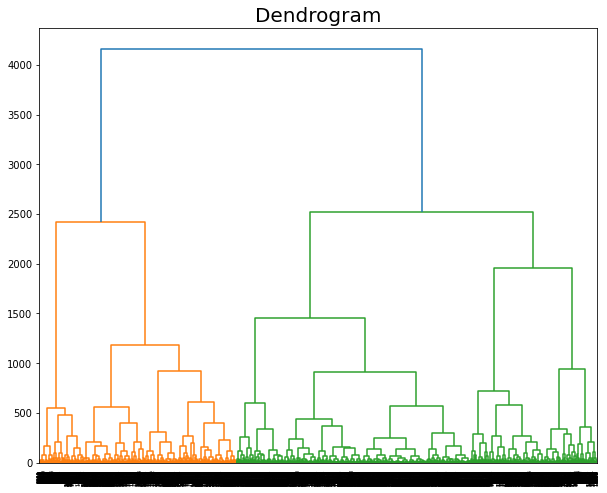

In [ ]:
plot_dendrogram(x, 'dendrogram_center')

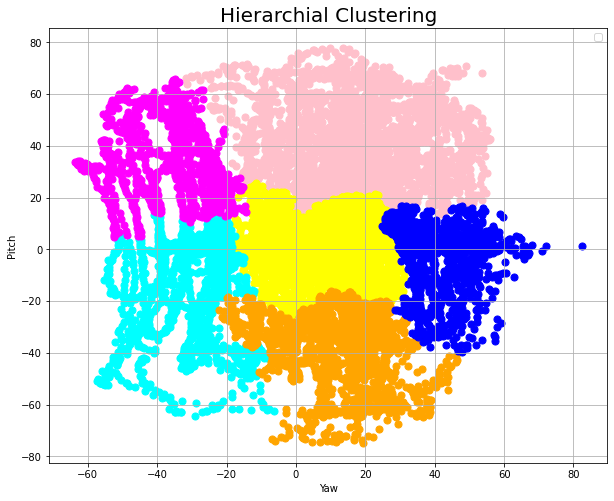

In [ ]:
plot_clustering(6, 'Biwi_clustering_6_agg_center', save=True)

# Average Mutual Distance